In [3]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil

In [4]:
from scipy import stats

In [28]:
import os
import numpy as np

# Spécifiez le chemin du répertoire Kaggle
kaggle_directory = '/kaggle/input/bootstrap3000-3/'  # Assurez-vous que le chemin est correct

# Initialisez une liste pour stocker les tableaux
arrays = []

# Parcourez les fichiers du répertoire
for filename in os.listdir(kaggle_directory):
    if filename.endswith(".npy"):  # Assurez-vous que le fichier est un fichier numpy
        file_path = os.path.join(kaggle_directory, filename)
        
        try:
            # Chargez le fichier numpy en tant qu'array et ajoutez-le à la liste
            array = np.load(file_path, allow_pickle=True)
            arrays.append(array)
        except FileNotFoundError:
            print(f"Le fichier '{filename}' n'a pas été trouvé dans le répertoire '{kaggle_directory}'. Vérifiez le nom du fichier ou le chemin du répertoire.")
        except Exception as e:
            print(f"Une erreur s'est produite lors du chargement du fichier '{filename}': {e}")

# Maintenant, vous avez tous les tableaux dans la liste 'arrays'
# Vous pouvez y accéder comme arrays[0], arrays[1], ..., arrays[n-1]


In [29]:
kaggle_directory1 = '/kaggle/input/bootstrap3000-2'
kaggle_directory2 = '/kaggle/input/bootstrap3000'
kaggle_directory3 = '/kaggle/input/bootstraaapech3000'
for filename in os.listdir(kaggle_directory1):
    if filename.endswith(".npy"):  # Assurez-vous que le fichier est un fichier numpy
        file_path = os.path.join(kaggle_directory1, filename)
        
        try:
            # Chargez le fichier numpy en tant qu'array et ajoutez-le à la liste
            array = np.load(file_path, allow_pickle=True)
            arrays.append(array)
        except FileNotFoundError:
            print(f"Le fichier '{filename}' n'a pas été trouvé dans le répertoire '{kaggle_directory}'. Vérifiez le nom du fichier ou le chemin du répertoire.")
        except Exception as e:
            print(f"Une erreur s'est produite lors du chargement du fichier '{filename}': {e}")
for filename in os.listdir(kaggle_directory2):
    if filename.endswith(".npy"):  # Assurez-vous que le fichier est un fichier numpy
        file_path = os.path.join(kaggle_directory2, filename)
        
        try:
            # Chargez le fichier numpy en tant qu'array et ajoutez-le à la liste
            array = np.load(file_path, allow_pickle=True)
            arrays.append(array)
        except FileNotFoundError:
            print(f"Le fichier '{filename}' n'a pas été trouvé dans le répertoire '{kaggle_directory}'. Vérifiez le nom du fichier ou le chemin du répertoire.")
        except Exception as e:
            print(f"Une erreur s'est produite lors du chargement du fichier '{filename}': {e}")
for filename in os.listdir(kaggle_directory3):
    if filename.endswith(".npy"):  # Assurez-vous que le fichier est un fichier numpy
        file_path = os.path.join(kaggle_directory3, filename)
        
        try:
            # Chargez le fichier numpy en tant qu'array et ajoutez-le à la liste
            array = np.load(file_path, allow_pickle=True)
            arrays.append(array)
        except FileNotFoundError:
            print(f"Le fichier '{filename}' n'a pas été trouvé dans le répertoire '{kaggle_directory}'. Vérifiez le nom du fichier ou le chemin du répertoire.")
        except Exception as e:
            print(f"Une erreur s'est produite lors du chargement du fichier '{filename}': {e}")


In [30]:
len(arrays)

288

In [59]:
import numpy as np

# Supposons que vous avez 60 tableaux stockés dans une liste appelée all_arrays
all_arrays = arrays

# Initialisation des listes pour chaque métrique
accuracy_scores, precision_scores, recall_scores, f1_scores, lrs_moins, lrs_plus = [], [], [], [], [], []

# Boucle de concaténation
for arr in all_arrays:
    accuracy_scores.append(arr[0])
    precision_scores.append(arr[1])
    recall_scores.append(arr[2])
    f1_scores.append(arr[3])
    lrs_moins.append(arr[4])
    lrs_plus.append(arr[5])

# Concaténation des listes pour obtenir les tableaux finaux
accuracy_scores = np.concatenate(accuracy_scores, axis=0)
precision_scores = np.concatenate(precision_scores, axis=0)
recall_scores = np.concatenate(recall_scores, axis=0)
f1_scores = np.concatenate(f1_scores, axis=0)
lrs_moins = np.concatenate(lrs_moins, axis=0)
lrs_plus = np.concatenate(lrs_plus, axis=0)


In [60]:
accuracy_scores.shape

(1150,)

In [71]:
filtered_values = lrs_plus[lrs_plus < 1100]


In [72]:
np.mean(filtered_values)

448.2456841857284

0.9943333333333333 0.9983333333333333
0.9948637201026627 0.9993673271420394
0.991486574983628 0.9980511862864804
0.9944448002815225 0.9983493446556813
0.001954165392434429 0.008519208593149405
184.01574803149506 746.0079893475277


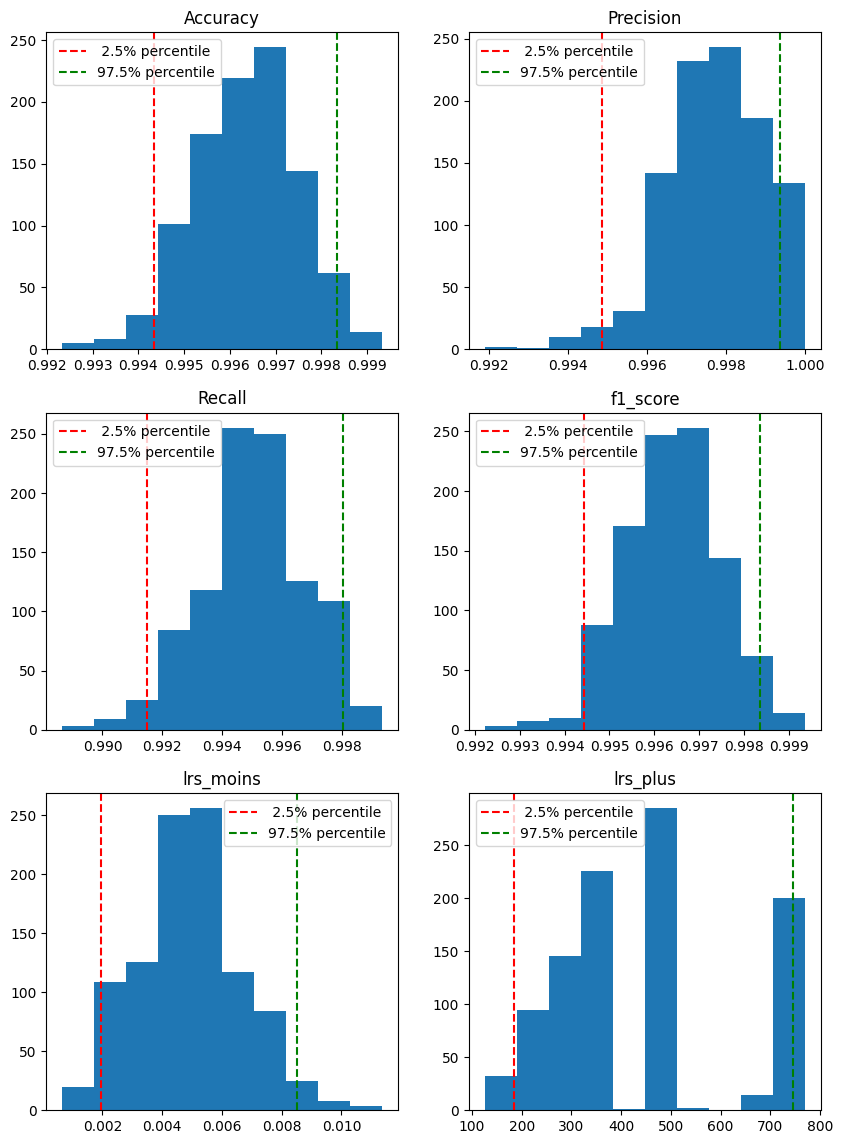

In [73]:
fig, axs = plt.subplots(3, 2, figsize=(10,14))
axs = axs.ravel()

# métriques +scores
metrics = ['Accuracy','Precision','Recall','f1_score','lrs_moins','lrs_plus']
scores = [accuracy_scores[0:999], precision_scores[0:999], recall_scores[0:999],f1_scores[0:999],lrs_moins[0:999],filtered_values]

for i in range(len(metrics)):
    # calculer l'intervalle de confiance à 95 % pour chaque métrique
    conf_interval = np.percentile(scores[i], [2.5, 97.5])
    print(conf_interval[0],conf_interval[1])
    # tracer l'histogramme avec l'intervalle de confiance
    axs[i].hist(scores[i], bins=10)
   
    # Définir l'échelle de l'axe des abscisses
    
    axs[i].axvline(conf_interval[0], color='red', linestyle='--', label=' 2.5% percentile')
    axs[i].axvline(conf_interval[1], color='green', linestyle='--',label='97.5% percentile')
   
    axs[i].set_title(metrics[i])
    axs[i].legend()

# afficher le graphique
plt.show()

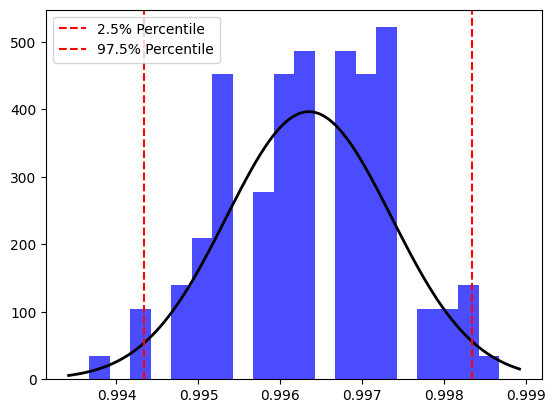

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Données d'accuracy
accuracy_values = np.array([0.99733333, 0.99566667, 0.997, 0.99733333, 0.99433333, 0.99733333, 0.99533333, 0.996, 0.996, 0.99533333, 0.99533333, 0.99866667, 0.997, 0.99533333, 0.996, 0.996, 0.99566667, 0.99533333, 0.997, 0.99466667, 0.99833333, 0.99666667, 0.995, 0.997, 0.99733333, 0.99466667, 0.99666667, 0.995, 0.997, 0.99633333, 0.99666667, 0.995, 0.997, 0.99633333, 0.99666667, 0.99833333, 0.995, 0.996, 0.99766667, 0.99833333, 0.997, 0.99633333, 0.99633333, 0.996, 0.99666667, 0.99433333, 0.996, 0.99733333, 0.99633333, 0.99533333, 0.996, 0.996, 0.99533333, 0.99633333, 0.99366667, 0.99533333, 0.99666667, 0.99733333, 0.99466667, 0.99666667, 0.998, 0.99833333, 0.99633333, 0.997, 0.996, 0.998, 0.99633333, 0.997, 0.995, 0.99633333, 0.99533333, 0.997, 0.998, 0.99733333, 0.99566667, 0.99633333, 0.997, 0.99666667, 0.995, 0.99733333, 0.99433333, 0.99666667, 0.99666667, 0.99533333, 0.997, 0.997, 0.99466667, 0.99666667, 0.99533333, 0.99733333, 0.99533333, 0.99666667, 0.99733333, 0.99766667, 0.996, 0.99733333, 0.99633333, 0.99666667, 0.996, 0.996, 0.99566667, 0.99766667, 0.99666667, 0.99633333, 0.99566667, 0.99733333, 0.99566667, 0.99633333, 0.99566667, 0.99733333, 0.99566667, 0.99733333, 0.99733333, 0.99533333, 0.99633333])

# Calcul de l'intervalle de confiance à 95%
confidence_interval = np.percentile(accuracy_values, [2.5, 97.5])

# Création de l'histogramme
plt.hist(accuracy_values, bins=20, density=True, alpha=0.7, color='blue')

# Ajout d'une courbe de densité gaussienne pour comparaison
mean_accuracy = np.mean(accuracy_values)
std_dev_accuracy = np.std(accuracy_values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean_accuracy) / std_dev_accuracy)**2) / (std_dev_accuracy * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

# Tracé de l'intervalle de confiance à 95%
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='2.5% Percentile')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label='97.5% Percentile')

# Affichage du graphique
plt.legend()
plt.show()
